# Avocado

Which avocado size is most popular?

Avocados are increasingly popular and delicious in guacamole and on toast. The Hass Avocado Board keeps track of avocado supply and demand across the USA, including the sales of three different sizes of avocado. This project will use a bar plot to figure out which size is the most popular.

Bar plots are great for revealing relationships between categorical (size) and numeric (number sold) variables, but manipulation on the data first is needed in order to get the numbers needed for plotting.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [36]:
avocados = pd.read_csv(r'C:\Users\elesm\OneDrive\Documents\avocado.csv', index_col=0)
avocados.head()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [37]:
avocados.tail()

,date,type,year,avg_price,size,nb_sold
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01
1013,2018-01-07,organic,2018,1.51,extra_large,1289.07


## Total number sold for each avocado size group

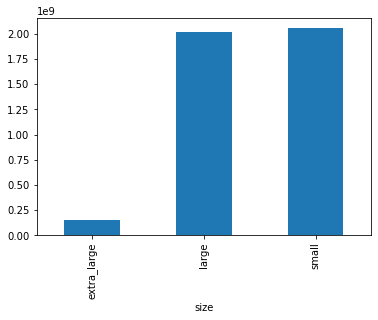

In [38]:
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()
nb_sold_by_size.plot(kind='bar', x='size', y='nb_sold')

plt.show()

Bedazzling bar plot! It looks like small avocados were the most-purchased size, but large avocados were a close second.

## Changes in sales over time

visualizing the change in avocado sales over three years.

Line plots are designed to visualize the relationship between two numeric variables, where each data values is connected to the next one. They are especially useful for visualizing change in a number over time, since each time point is naturally connected to the next time point.

### the total number of avocados sold on each date

In [39]:
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
nb_sold_by_date.head()

date
2015-01-04    27279606.03
2015-01-11    25081927.33
2015-01-18    24961540.48
2015-01-25    24094678.66
2015-02-01    39838734.08
Name: nb_sold, dtype: float64

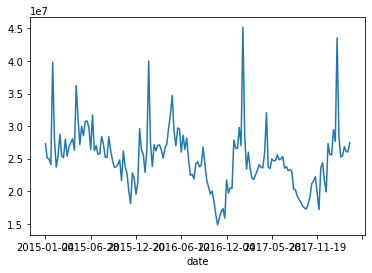

In [40]:
nb_sold_by_date.plot(kind='line', x='date', y='nb_sold')
plt.show()

Here, it looks like the number of avocados spikes around the same time each year.

### Avocado supply and demand

comparing the number of avocados sold to average price and see if they're at all related. If they're related, one number may be used to predict the other.

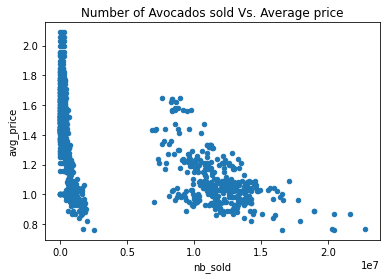

In [41]:
avocados.plot(kind='scatter', x='nb_sold', y='avg_price', title='Number of Avocados sold Vs. Average price')
plt.show()

It looks like when more avocados are sold, prices go down. However, this doesn't mean that fewer sales causes higher prices - we can only tell that they're correlated with each other.

## Price of conventional vs. organic avocados

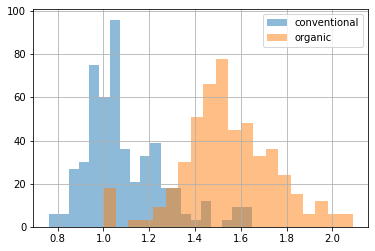

In [42]:
avocados[avocados['type']=='conventional']['avg_price'].hist(bins=20, alpha=0.5)
avocados[avocados['type']=='organic']['avg_price'].hist(bins=20, alpha=0.5)
plt.legend(['conventional', 'organic'])
plt.title='Price of Conventional vs. organic avocados'
plt.show()

We can see that on average, organic avocados are more expensive than conventional ones, but their price distributions have some overlap.

## Missing Values

In [43]:
avocados_2016=pd.read_csv(r'C:\Users\elesm\OneDrive\Documents\avocados_2016.csv')
avocados_2016.head()

,Unnamed: 0,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
0,0,2016-12-25,1.00,30287853.70,9255125.20,10282925.61,541972.42,10207830.47,7709584.33,2417144.92,81101.22
1,1,2016-12-18,0.96,29583882.61,9394065.91,10339168.20,427872.42,9422776.08,6970320.34,2358443.96,94011.78
2,2,2016-12-11,0.98,30093540.70,9009996.11,NaN,403047.93,10713276.64,8149438.75,2490495.07,73342.82
3,3,2016-12-04,1.00,31621221.90,11043350.90,9908982.97,428009.84,10240878.19,7187022.58,2988504.98,65350.63
4,4,2016-11-27,1.21,22923062.65,7891487.94,7337341.77,NaN,7349757.04,5691266.56,1609867.20,48623.28


In [44]:
avocados_2016.tail()

,Unnamed: 0,date,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
47,47,2016-01-31,0.93,34721249.92,11098088.49,13278053.61,1643703.17,8701404.65,6684515.27,1823889.58,192999.80
48,48,2016-01-24,0.95,32787079.21,7020459.00,14054367.50,1440380.36,10271872.35,7438489.60,2668368.01,165014.74
49,49,2016-01-17,0.94,34426341.87,10036597.84,13832256.04,1419405.62,9138082.37,6846324.06,2228420.91,63337.40
50,50,2016-01-10,0.93,35264336.01,NaN,13226088.66,1282612.91,9314347.55,6735384.32,2528089.14,50874.09
51,51,2016-01-03,0.86,38142088.04,NaN,16054083.86,1560068.62,8911429.39,6464895.83,2287449.76,159083.80


In [45]:
avocados_2016.isna().any()

Unnamed: 0         False
date               False
avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

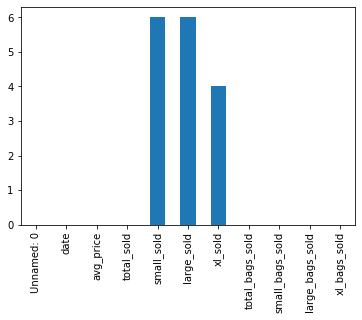

In [46]:
avocados_2016.isna().sum().plot(kind='bar')
plt.show()

It looks like there are missing values in the small_sold, large_sold, and xl_sold columns.

## Removing missing values

every row containing missing values will be deleted

In [47]:
avocados_complete = avocados_2016.dropna()
avocados_complete.isna().any()

Unnamed: 0         False
date               False
avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

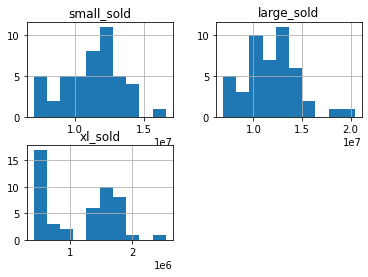

In [48]:
avocados_2016[["small_sold", "large_sold", "xl_sold"]].hist()
plt.show()